In [190]:
#Core Libraries
import numpy as np
import pandas as pd

import os
os.getcwd()

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

#Handling Imbalance
from imblearn.over_sampling import SMOTE

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')



In [191]:
df = pd.read_csv(r'C:\Users\91812\OneDrive\Desktop\BIA\Data Science & Artificial Intelligence\Capstone Project\employee_attrrition_train.csv')

In [192]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [193]:
df.shape

(19158, 14)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

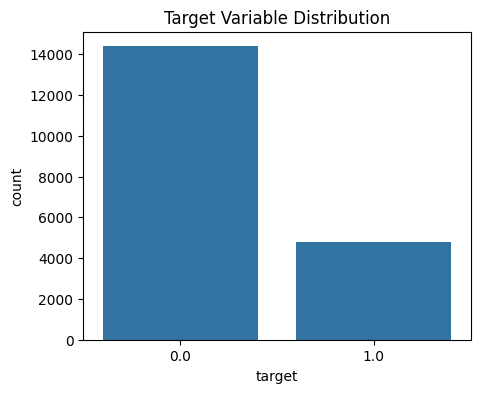

In [195]:
#Exploratory Data Analysis(EDA)
#Target Variable distribution
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.show()

#0 - Stayed(No Job Change); 1 - Left(Job Change)
#Observation: The dataset is imbalanced with more employees stay than leaving the job

In [196]:
#Missing Values Check
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

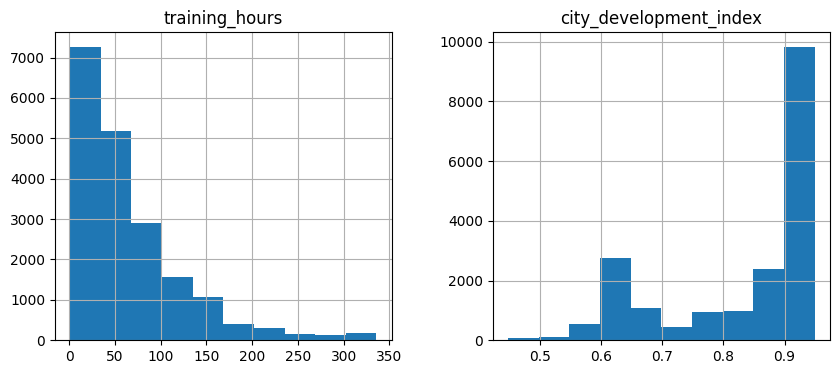

In [197]:
#Numerical Features distribution
num_cols = ['training_hours', 'city_development_index']

df[num_cols].hist(figsize=(10,4))
plt.show()

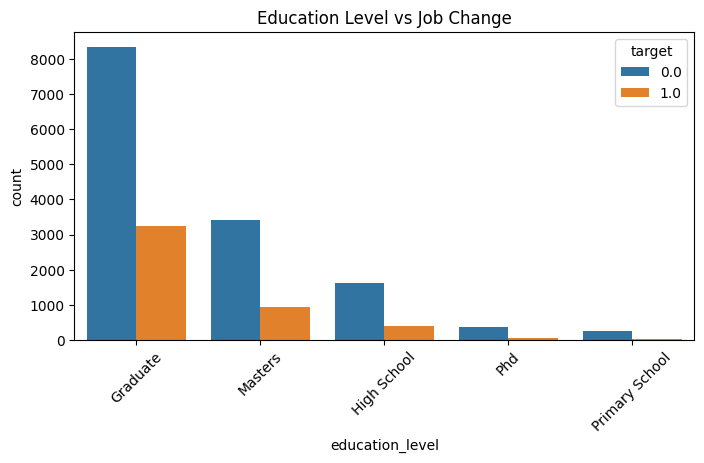

In [198]:
#Categorical Features vs Target variable
plt.figure(figsize=(8,4))
sns.countplot(x='education_level', hue='target', data=df)
plt.xticks(rotation=45)
plt.title("Education Level vs Job Change")
plt.show()

In [199]:
#Data Preprocessing
#1. Handle experience column
df['experience'].replace('>20', 21, inplace=True)
df['experience'].replace('<1', 0, inplace=True)
df['experience'] = df['experience'].astype(float)

In [200]:
#Data Preprocessing
#2. Fill missing values in experience with median
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

enrollee_id                0
city                       0
city_development_index     0
gender                     0
relevent_experience        0
enrolled_university        0
education_level            0
major_discipline           0
experience                65
company_size               0
company_type               0
last_new_job               0
training_hours             0
target                     0
dtype: int64

In [201]:
#Data Preprocessing
#3. Encode categorical variables
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [202]:
num_cols = [
    "city_development_index",
    "experience",
    "training_hours"
]

In [203]:
#Data Preprocessing
#4. Feature Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [204]:
# Sanity check
scaler.feature_names_in_

array(['city_development_index', 'experience', 'training_hours'],
      dtype=object)

In [239]:
#Train-Test Split
X = df.drop(["target", "enrollee_id"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [240]:
print(X)

           city  city_development_index    gender  relevent_experience  \
0     -1.105203                0.738919  0.204235            -0.623752   
1      0.925077               -0.428410  0.204235             1.603202   
2      0.558499               -1.660590  0.204235             1.603202   
3     -0.851418               -0.323026  0.204235             1.603202   
4      0.163722               -0.501368  0.204235            -0.623752   
...         ...                     ...       ...                  ...   
19153  0.304714                0.398448  0.204235             1.603202   
19154 -1.105203                0.738919  0.204235            -0.623752   
19155 -1.105203                0.738919  0.204235            -0.623752   
19156  1.404449               -0.217642  0.204235            -0.623752   
19157  1.432647                0.212000  0.204235             1.603202   

       enrolled_university  education_level  major_discipline  experience  \
0                 0.568358        

In [207]:
X_train.isna().sum()

city                       0
city_development_index     0
gender                     0
relevent_experience        0
enrolled_university        0
education_level            0
major_discipline           0
experience                50
company_size               0
company_type               0
last_new_job               0
training_hours             0
dtype: int64

In [208]:
smote = SMOTE(random_state=42)

In [209]:
#Identify columns with NaN values in X_train
X_train.isnull().sum()[X_train.isnull().sum() > 0]

experience    50
dtype: int64

In [210]:
#Fix experience & last_new_job which often contains strings + NaN values
# Fix experience
df['experience'].replace('>20', 21, inplace=True)
df['experience'].replace('<1', 0, inplace=True)
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')

# Fix last_new_job
df['last_new_job'].replace('>4', 5, inplace=True)
df['last_new_job'].replace('never', 0, inplace=True)
df['last_new_job'] = pd.to_numeric(df['last_new_job'], errors='coerce')

In [211]:
#Impute Remaining Missing Values
#Numerical - Median; Categorical - Mode
# Separate columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

# Numerical imputation
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical imputation
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [212]:
#Re-check
df.isnull().sum().sum()

np.int64(0)

In [213]:
#Encode & Scale (again after imputing)
# Encode categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [214]:
#Tain-Test Split (again after imputing)
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [215]:
y_train.head()
y_train.unique()
y_train.dtype

dtype('float64')

In [216]:
y = df['target'] #Choosen the correct target column

In [217]:
le = LabelEncoder()     
y = le.fit_transform(y) # Yes → 1, No → 0

In [218]:
y = y.astype(int) #fix to integer type

In [219]:

# Target
y = df['target']

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Feature Scaling
X = df.drop('target', axis=1)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [220]:
#Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [221]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(11504), np.int64(1): np.int64(3822)}

In [222]:
y = pd.Series(le.fit_transform(df['target']), name='target')

In [223]:
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_sm).value_counts())

Before SMOTE:
0    11504
1     3822
Name: count, dtype: int64

After SMOTE:
0    11504
1    11504
Name: count, dtype: int64


In [224]:
#Model Training
#Logical Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sm, y_train_sm)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [225]:
#Model Training
#Randrom Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_sm, y_train_sm)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [226]:
#Model Training
#XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train_sm, y_train_sm)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [227]:
#Model Training
#LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train_sm, y_train_sm)

[LightGBM] [Info] Number of positive: 11504, number of negative: 11504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2472
[LightGBM] [Info] Number of data points in the train set: 23008, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [228]:
#Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    print("Accuracy:", acc)
    print("ROC-AUC:", roc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

    return acc, roc

Accuracy: 0.7139874739039666
ROC-AUC: 0.7540842973792873

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      2877
           1       0.45      0.67      0.54       955

    accuracy                           0.71      3832
   macro avg       0.66      0.70      0.67      3832
weighted avg       0.77      0.71      0.73      3832



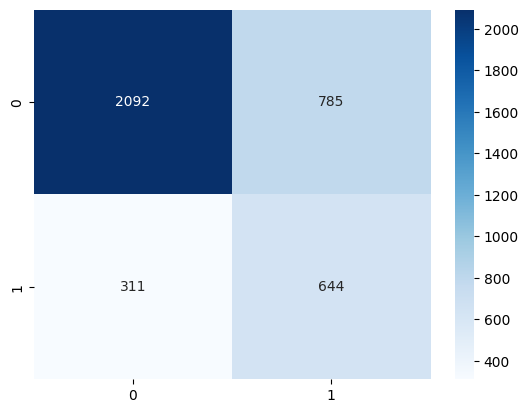

In [229]:
#Evaluate All Models
#Logistic Regression
lr_acc, lr_roc = evaluate_model(lr, X_test, y_test)

Accuracy: 0.776356993736952
ROC-AUC: 0.7906785536853943

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2877
           1       0.55      0.55      0.55       955

    accuracy                           0.78      3832
   macro avg       0.70      0.70      0.70      3832
weighted avg       0.78      0.78      0.78      3832



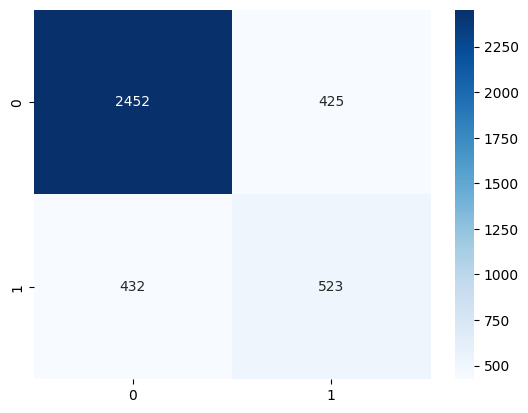

In [230]:
#Evaluation Model
#Random Forest
rf_acc, rf_roc = evaluate_model(rf, X_test, y_test)


Accuracy: 0.7758350730688935
ROC-AUC: 0.7838560746268929

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      2877
           1       0.55      0.53      0.54       955

    accuracy                           0.78      3832
   macro avg       0.70      0.70      0.70      3832
weighted avg       0.77      0.78      0.77      3832



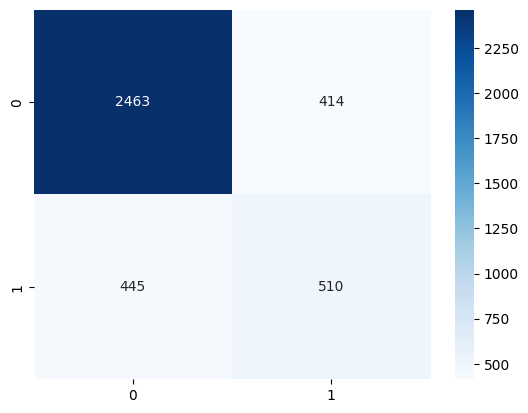

In [231]:
#Evaluation Model
#XGBoost
xgb_acc, xgb_roc = evaluate_model(xgb, X_test, y_test)

Accuracy: 0.7813152400835073
ROC-AUC: 0.8000658772317732

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      2877
           1       0.56      0.61      0.58       955

    accuracy                           0.78      3832
   macro avg       0.71      0.72      0.72      3832
weighted avg       0.79      0.78      0.78      3832



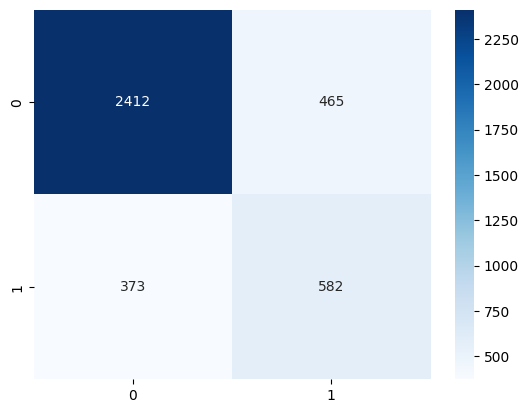

In [232]:
#Evaluation Model
#LightGBM
lgbm_acc, lgbm_roc = evaluate_model(lgbm, X_test, y_test)

In [233]:
#Model Comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy': [lr_acc, rf_acc, xgb_acc, lgbm_acc],
    'ROC-AUC': [lr_roc, rf_roc, xgb_roc, lgbm_roc]
})

results

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.713987,0.754084
1,Random Forest,0.776357,0.790679
2,XGBoost,0.775835,0.783856
3,LightGBM,0.781315,0.800066


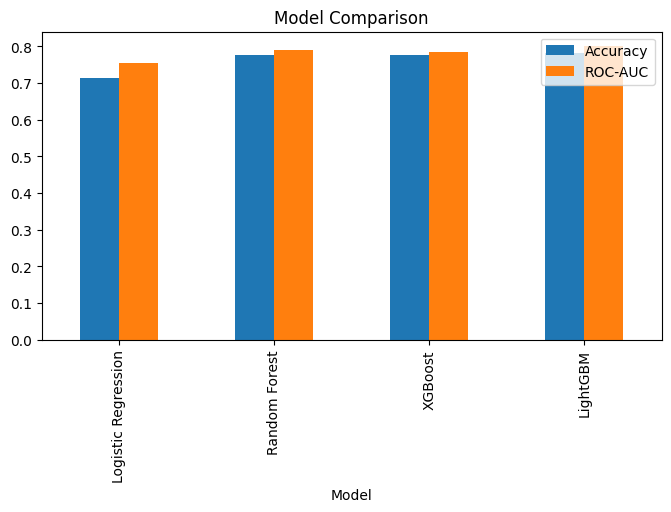

In [234]:
results.plot(x='Model', y=['Accuracy', 'ROC-AUC'], kind='bar', figsize=(8,4))
plt.title("Model Comparison")
plt.show()

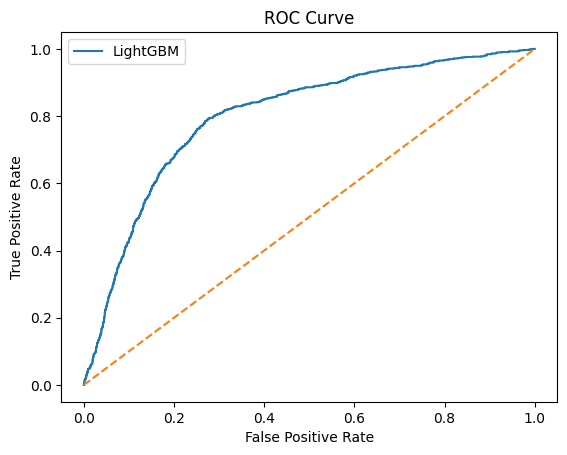

In [235]:
#ROC Curve
y_prob = lgbm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="LightGBM")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

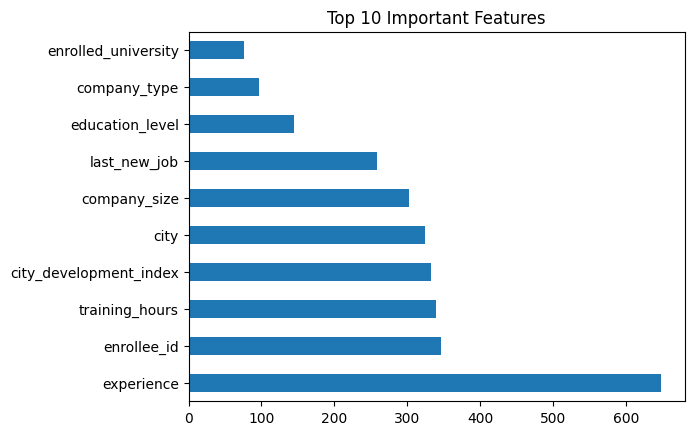

In [236]:
#Feature Importance
feature_imp = pd.Series(lgbm.feature_importances_, index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [237]:
#Business Insight: Experience, company size, training hours, and city development index strongly influence attrition.
#Conclusion: LightGBM achieved best ROC-AUC and accuracy;SMOTE improved minority class prediction;Model helps in early identification of employees likely to leave.
#Model Conclusion:
#LightGBM outperformed other models with highest ROC-AUC and accuracy, indicating its effectiveness in predicting employee attrition.
#SMOTE successfully addressed class imbalance, enhancing model performance on minority class.
#The model can assist HR in proactively identifying employees at risk of leaving, enabling targeted retention strategies.

In [238]:
import joblib
joblib.dump(lgbm, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']